In [73]:
import numpy as np
import pandas as pd
# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Model Select
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import library confusion matrix
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score ,precision_score,recall_score,f1_score

# Import library SMOTE
#from imblearn.over_sampling import SMOTE

# Import Library Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

# Import libarary Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import libarary Support Vector Machine
from sklearn import svm

# Import libarary Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import libarary Naive Bayes
from sklearn.naive_bayes import GaussianNB

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')


In [74]:
df = pd.read_excel('C://Users//sekarw//Documents//Book1.xlsx')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [75]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


In [76]:
#mengetahui informasi mengenai datframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [77]:
#Mengetahui jumlah baris dan jumlah kolom dari dataframe 
df.shape

(41188, 21)

In [78]:
# Mengetahui nilai unique pada data kolom 
for i in df.columns:
    print("\n", i)
    print(df[i].unique())


 age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

 job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 marital
['married' 'single' 'divorced' 'unknown']

 education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 default
['no' 'unknown' 'yes']

 housing
['no' 'yes' 'unknown']

 loan
['no' 'yes' 'unknown']

 contact
['telephone' 'cellular']

 month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

 duration
[ 261  149  226 ... 1246 1556 1868]

 campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

In [79]:
#mengecek data missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [80]:
#mengecek data duplikat
df.duplicated().sum()

12

In [81]:
#menghapus data duplikat
df.drop_duplicates(inplace=True)

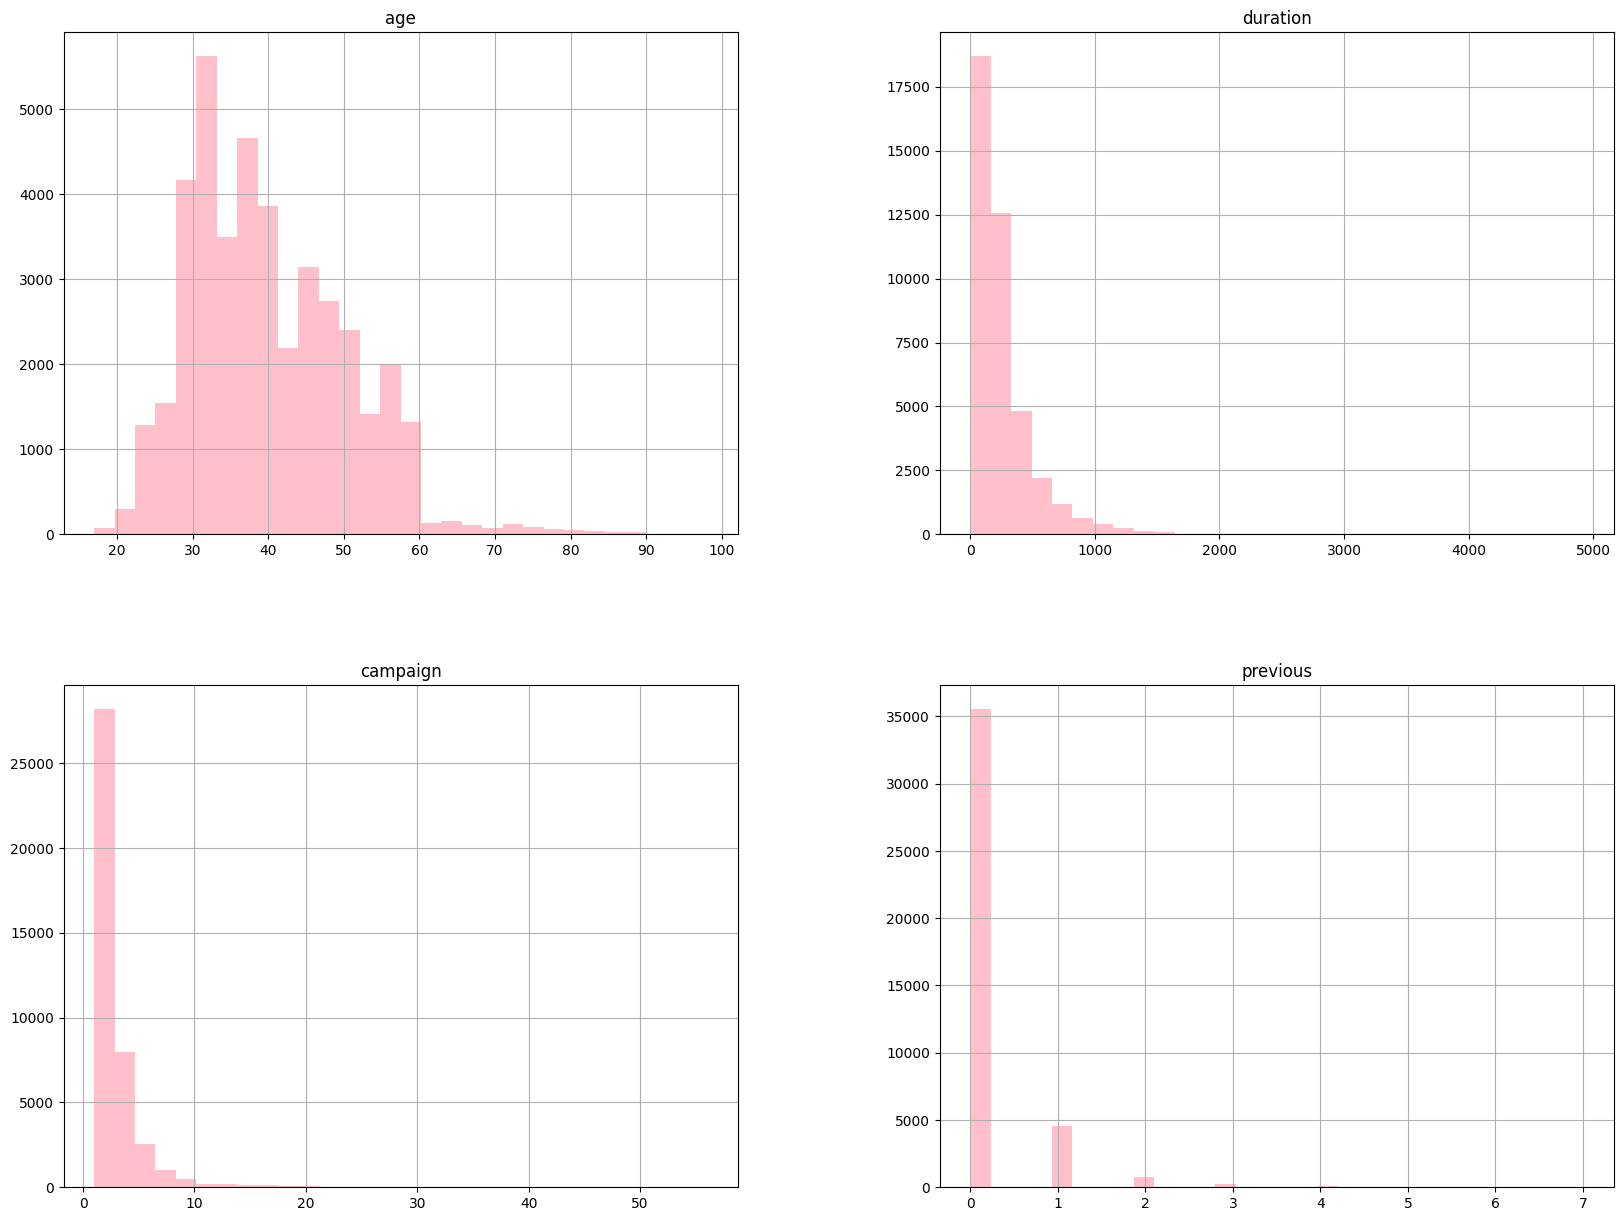

In [82]:
#Menampilkan grafik histogram pada kolom age, duration, campaign, dan previous.
df[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15), color='pink')
plt.show()

In [83]:
#Membuat variabel kategori untuk menampung data dengan tipe data object dan boolean
category = df.select_dtypes(include=['object', 'bool']).columns.values

for col in category:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']
y ( 2 values):
 ['no' 'yes']


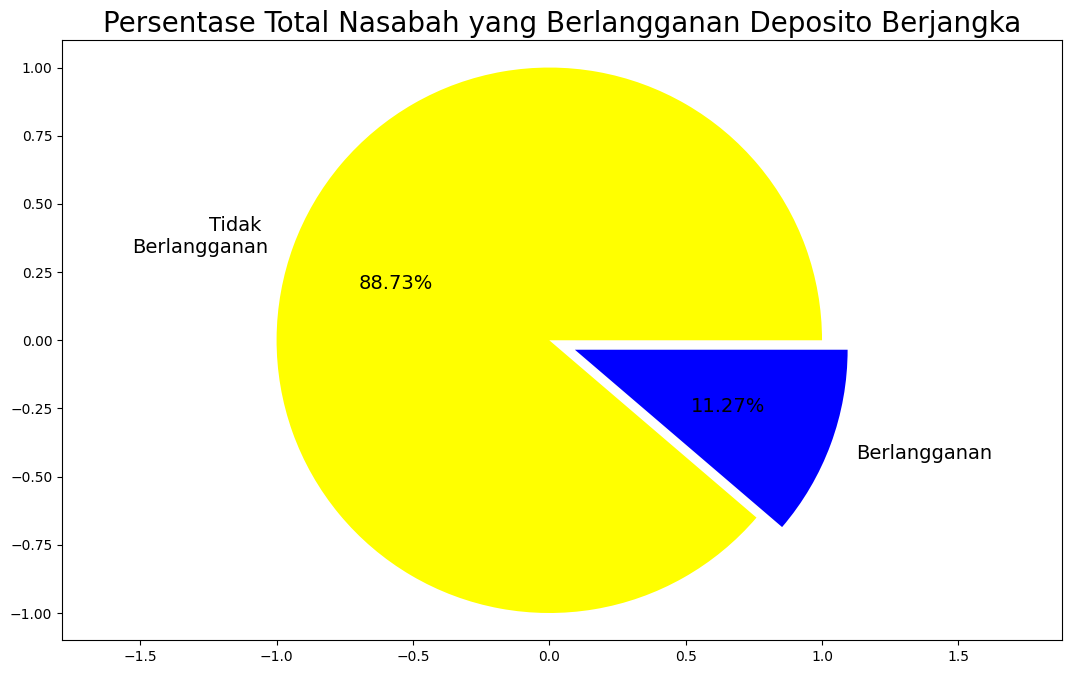

In [84]:
# Membuat pie chart untuk nasabah yang berlangganan deposito berjangka
mylabels = ["Tidak \nBerlangganan", "Berlangganan"]
mycolors = ["yellow", "blue"]
explode = (0, 0.1)
fig = plt.figure(figsize=(10,6)) 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['y'].value_counts(), 
       labels = mylabels,
       colors = mycolors,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=14)) 

ax.axis('equal') 
plt.title('Persentase Total Nasabah yang Berlangganan Deposito Berjangka',
     color = 'black',
     fontsize = 20
     )

plt.show()

* kesimpulan : 
dapat dilihat pada plot pie chart diatas presentase total nasabah yang berlangganan deposito sebesar 11.27% dan 88.73% tidak berlanggan deposito

In [85]:
#Membuat definisi cross_tab untuk EDA

def cross_tab(data,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for i in edu:
        df_i=df[df[f2]==i]
        df_i_job=df_i.groupby(f1).count()[f2]
        dataframes.append(df_i_job)
    new_cross=pd.concat(dataframes,axis=1)
    new_cross.columns=edu
    new_cross=new_cross.fillna(0)
    return new_cross

In [86]:
#Melihat cross_tab untuk variabel job dan education

cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5750,1.0
blue-collar,2318,878,1425,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,97,284,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2680,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


In [87]:
#Mengisi data 'unknown' pada kolom job dengan data yang relevan
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [88]:
#Melihat cross_tab untuk variabel job dan education
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5750,1.0
blue-collar,2366.0,878,1447.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,111.0,285,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2830,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


In [89]:
#Melihat cross_tab untuk variabel job dan housing
cross_tab(df,'job','housing')

,no,yes,unknown
job,,,
admin.,4634,5558,227
blue-collar,4361,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,787,908,44
self-employed,641,740,40
services,1817,2049,101
student,381,471,23


In [90]:
#Menghilangkan data yang bernilai unknown
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.default != 'unknown']
df = df[df.job != 'unknown']
df = df[df.marital != 'unknown']
df = df[df.education != 'unknown']

In [91]:
cross_tab(df,'job','housing')

,no,yes
job,,
admin.,3957,4777
blue-collar,2692,3042
entrepreneur,487,602
housemaid,336,385
management,1130,1273
retired,555,667
self-employed,500,592
services,1410,1555
student,282,328


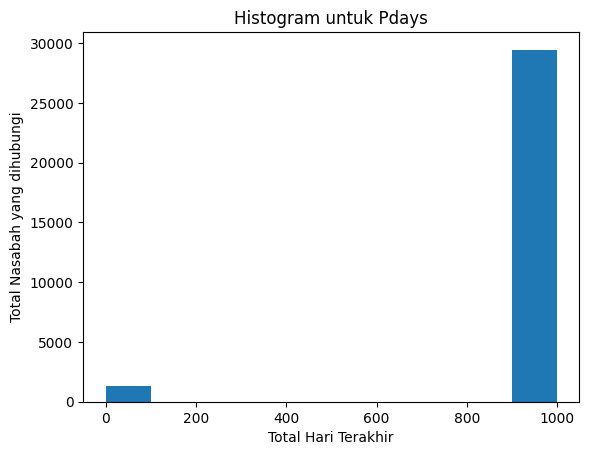

In [92]:
#membuat plot histogram untuk pdays
plt.hist(df['pdays'])
plt.title('Histogram untuk Pdays')
plt.xlabel('Total Hari Terakhir')
plt.ylabel('Total Nasabah yang dihubungi')
plt.show()

* kesimpulan : Dapat Dilihat Dari hasil data histogram di atas dapat disimpulkan bahwa hari terakhir menghubungi nasaah di sekitar hari ke - 999 yang dimana terdapat kerancuan yang mengidinkasikan bahwa nasabah sebelumnya tidak dihubungi. Sehingga nilai ini perlu diubah menjadi value kategorie.

In [93]:
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1

In [94]:
#Encode data variabel kategori dengan encoder label

kategoris = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for cols in kategoris:
    df[cols] = label_encoder.fit_transform(df[cols])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,3,1,0,0,0,0,1,6,1,...,1.1,93994.0,-36.4,4857.0,5191.0,0,1,0,0,0
2,37,7,1,3,0,1,0,1,6,1,...,1.1,93994.0,-36.4,4857.0,5191.0,0,1,0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,1.1,93994.0,-36.4,4857.0,5191.0,0,1,0,0,0
4,56,7,1,3,0,0,1,1,6,1,...,1.1,93994.0,-36.4,4857.0,5191.0,0,1,0,0,0
6,59,0,1,5,0,0,0,1,6,1,...,1.1,93994.0,-36.4,4857.0,5191.0,0,1,0,0,0


# Modeling

In [95]:
train,test = train_test_split(df,test_size = 0.30 ,random_state = 350)
    
#Memisahkan variabel dependen dan independen pada data training dan testing
x_train = train.drop(labels='y',axis=1)
y_train = train['y']
x_test  = test.drop(labels='y',axis=1)
y_test  = test['y']


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

* Logistic Regression

In [96]:
#Membuat model logistic regression
logistic_reg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=50)
logistic_reg.fit(x_train, y_train)


x_test = scaler.transform(x_test) #untuk menguji dataset
y_pred = logistic_reg.predict(x_test) #memprediksi output


print('\n\n')
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8095
           1       0.66      0.43      0.52      1140

    accuracy                           0.90      9235
   macro avg       0.79      0.70      0.73      9235
weighted avg       0.89      0.90      0.89      9235



In [97]:
#Confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7842  253]
 [ 650  490]]


In [98]:
#Akurasi dari Logistic Regression

print('Akurasi untuk Logistic Regression:', logistic_reg.score(x_test, y_test))

Akurasi untuk Logistic Regression: 0.9022198159177044


* K-NEAREST NEIGHBORS

In [99]:
#Membuat model K-Nearest Neighbors
KNN = KNeighborsClassifier(n_neighbors=50)

# Train model menggunakan training set
KNN.fit(x_train, y_train)

# Memprediksi respon/output
y_pred1 = KNN.predict(x_test)

In [100]:
#Akurasi dari K-Nearest Neighbors
print("Akurasi untuk K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))

Akurasi untuk K-Nearest Neighbors: 0.8922577152138603


* Support Vector Machine

In [101]:
# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
svm_model.fit(x_train, y_train) 

# Predict the response for test dataset
y_pred2 = svm_model.predict(x_test)

In [102]:
#Akurasi dari Support Vector Machine
print("Akurasi untuk Support Vector Machine:", metrics.accuracy_score(y_test, y_pred2))

Akurasi untuk Support Vector Machine: 0.8925825663237683


* DecisionTree Classifier

In [103]:
model_dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
model_dtc = model_dtc.fit(x_train,y_train)

# Predict the response for test dataset
y_pred3 = model_dtc.predict(x_test)

In [104]:
#Akurasi dari Decision Tree

print("Akurasi untuk Decision Tree:",metrics.accuracy_score(y_test, y_pred3))

Akurasi untuk Decision Tree: 0.902652950730915


* Random Forest

In [105]:
#Membuat model Random Forest
model_rfc = RandomForestClassifier(n_estimators=100)
 
# Train the model using the training
model_rfc.fit(x_train,y_train) 

y_pred4 = model_rfc.predict(x_test)

In [106]:
#Akurasi untuk Random Forest
print("Akurasi untuk Random Forest:",metrics.accuracy_score(y_test, y_pred4))

Akurasi untuk Random Forest: 0.9046020573903627


* Naive Bayes

In [107]:
# Create a Gaussian Classifier
model_gnb = GaussianNB()

# Train the model using the training sets
model_gnb.fit(x_train, y_train)

# Predict the response for test dataset
y_pred5 = model_gnb.predict(x_test)

In [108]:
#Akurasi dari Naive Bayes

print("Akurasi untuk Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Akurasi untuk Naive Bayes: 0.6988630211153222


# Kesimpulan :
Berdasarkan hasil analisis dari model evaluasi yang telah dilakukan, dapat disimpulkan bahwa model Random Forest memiliki nilai akurasi tertinggi yaitu sebesar 0.9046 untuk memprediksi nasabah bank di masa yang akan datang